- Import Library

In [1]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

- Load given sample dataset. 
- May be collected from a survey.

In [2]:
# Filename
filename = "Dataset/Musical_instruments_reviews.csv"

# Read file
populasi = pd.read_csv(filename)
populasi.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
populasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [4]:
populasi['overall'].unique()

array([5., 3., 4., 2., 1.])

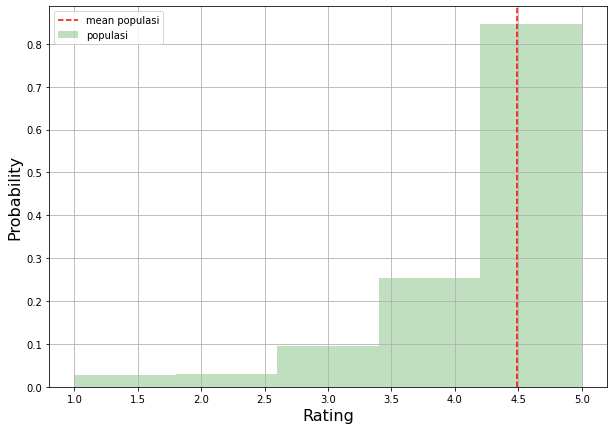

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# buat histogram
ax.hist(populasi['overall'],
        bins=5,
        density = True,
        facecolor = "g",
        alpha = 0.25,
        label = "populasi")

# plot mean populasi
ax.axvline(np.mean(populasi['overall']),
           color = "red",
           linestyle = "--",
           label = "mean populasi")

# Rapihkan plot
ax.set_xlabel("Rating", fontsize=16)
ax.set_ylabel("Probability", fontsize=16)

plt.legend()
plt.grid(True)
plt.show()

In [6]:
#Check any duplicated sample based on no_review
populasi["reviewerID"].duplicated().any()

#Check Duplicate

True

In [7]:
# Calculate mean of sample
mean_populasi = np.mean(populasi['overall'])
print(f"population mean    : {mean_populasi:.2f}")

population mean    : 4.49


In [8]:
#Remove Duplicate
clean_sample=populasi.drop_duplicates(subset=['reviewerID'],keep='last')
clean_sample.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
2007,A5I7XOLQRH9YE,B0002F741Q,Corbin,"[0, 0]",They are some of the best drum sticks i've pla...,5.0,Loved them,1403568000,"06 24, 2014"
3560,A34IJACMU8C3IM,B0002ZPK5I,"Rob W. ""Sounddude""","[33, 34]","The Shure XLR Female to Male 1/4"" Adapter is s...",5.0,A Must Have In The Audio Kit,1229212800,"12 14, 2008"
3578,A56EP6FFRH1YT,B00063678K,J. Kim,"[4, 4]",I've used this pedal with a Casio PX200 keyboa...,4.0,Good pedal for price,1209081600,"04 25, 2008"
3580,A1N46MR82AUE4T,B00063678K,JR,"[0, 0]",This pedal is very nice. It looks much more ex...,5.0,Beautiful!,1390867200,"01 28, 2014"
3733,A3QTFLU2ZWH7WS,B0006ZXFWO,Audie,"[5, 5]",I was worried about dropping my guitar on my f...,5.0,Jim Dunlop 7007SI Dun Ergo Lok Strap Syst,1363564800,"03 18, 2013"


In [9]:
clean_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 2007 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      1429 non-null   object 
 1   asin            1429 non-null   object 
 2   reviewerName    1427 non-null   object 
 3   helpful         1429 non-null   object 
 4   reviewText      1425 non-null   object 
 5   overall         1429 non-null   float64
 6   summary         1429 non-null   object 
 7   unixReviewTime  1429 non-null   int64  
 8   reviewTime      1429 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 111.6+ KB


In [10]:
# Check any duplicated sample based on no_review
clean_sample["reviewerID"].duplicated().any()

# There is no duplicate

False

In [11]:
# Filter the only needed data, i.e. rating
rating_df = clean_sample["overall"]

rating_df.head()

2007    5.0
3560    5.0
3578    4.0
3580    5.0
3733    5.0
Name: overall, dtype: float64

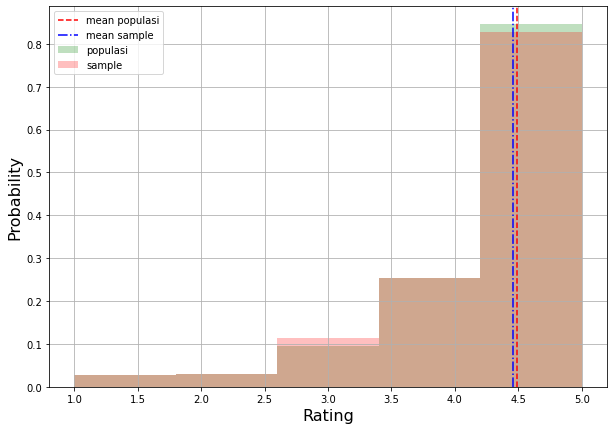

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# buat histogram
ax.hist(populasi['overall'],
        bins=5,
        density = True,
        facecolor = "g",
        alpha = 0.25,
        label = "populasi")

# buat histogram
ax.hist(rating_df,
        bins=5,
        density = True,
        facecolor = "r",
        alpha = 0.25,
        label = "sample")

# plot mean populasi
ax.axvline(np.mean(populasi['overall']),
           color = "red",
           linestyle = "--",
           label = "mean populasi")

# plot mean mean sample
ax.axvline(np.mean(rating_df),
           color = "blue",
           linestyle = "-.",
           label = "mean sample")

# Rapihkan plot
ax.set_xlabel("Rating", fontsize=16)
ax.set_ylabel("Probability", fontsize=16)

plt.legend()
plt.grid(True)
plt.show()

---
# **Analysis**

---
#**Sample Mean**

- We can use this formula

$$
\bar{y} = \cfrac{1}{n} \sum_{i=1}^{n} y_{i}
$$

In [13]:
# Find number of sample
n = len(rating_df)
print(f"number of sample : {n}")

number of sample : 1429


In [14]:
# Calculate mean of sample
y_bar = np.mean(rating_df)
print(f"Estimated population mean    : {y_bar:.2f}")

Estimated population mean    : 4.46


---
#**Estimate the mean estimator variance** ($\widehat{\text{var}}(\bar{y})$)

In [15]:
# Calculate the mean variance
var_y = np.var(rating_df, 
               ddof = 1)

print(f"Sample variance             : {var_y:.2f}")

Sample variance             : 0.83


In [16]:
# Calculate the mean estimator variance
N = len(populasi)
var_estimator = ((N-n)/N) * (var_y/n)
print(f"Mean estimator variance     : {var_estimator:.6f}")

Mean estimator variance     : 0.000501


---
#**90% Confidence Interval**

In [17]:
from scipy import stats

In [18]:
# Calculate z-stat (n > 30)
alpha = 0.10
stat_z = stats.norm.ppf(q = 1-alpha/2)
print(f"z_stat = {stat_z:.4f}")

z_stat = 1.6449


In [19]:
# Calculate the margin of error
d = stat_z * np.sqrt(var_estimator)
print(f"Margin of error: {d:.2f}")

Margin of error: 0.04


In [20]:
# Calculate the confidence interval [lower, upper]
lower_bound = y_bar - d
upper_bound = y_bar + d

print(f"We are 90% confidence that the true mean rating lies between {lower_bound:.2f} and {upper_bound:.2f}")

We are 90% confidence that the true mean rating lies between 4.42 and 4.50


In [21]:
def pdf_normal(x, mu, var):
    """Calculate the probability density function (PDF) of a normal distribution.

    Parameters
    ----------
    x : array_like
        The values at which to calculate the PDF.
    mu : float
        The mean of the normal distribution.
    var : float
        The variance of the normal distribution.

    Returns
    -------
    pdf : ndarray
        The PDF of the normal distribution evaluated at the given values of x.

    Notes
    -----
    The normal distribution is defined by the probability density function:

        f(x | mu, var) = (1 / sqrt(2 * pi * var)) * exp(-((x - mu) ** 2) / (2 * var))

    where mu is the mean and var is the variance.

    """
    return (1 / np.sqrt(2 * np.pi * var)) *\
        np.exp(-(1 / (2 * var)) * (x - mu) ** 2)

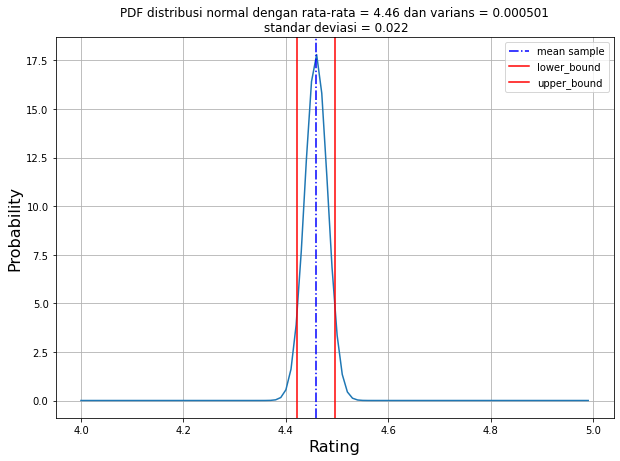

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
x_axis = np.arange(4, 5, 0.01)
y_axis = pdf_normal(x_axis, y_bar, var_estimator)
plt.plot(x_axis, y_axis)

# plot mean mean sample
ax.axvline(y_bar,
           color = "blue",
           linestyle = "-.",
           label = "mean sample")

ax.axvline(lower_bound,
           color = "red",
           linestyle = "-",
           label = "lower_bound")

ax.axvline(upper_bound,
           color = "red",
           linestyle = "-",
           label = "upper_bound")

# Rapihkan plot
ax.set_xlabel("Rating", fontsize=16)
ax.set_ylabel("Probability", fontsize=16)
plt.title('PDF distribusi normal dengan rata-rata = '+str(np.round(y_bar,2))+' dan varians = '+str(np.round(var_estimator,6))+'\n standar deviasi = ' + str(np.round(np.sqrt(var_estimator),3)))
plt.legend()
plt.grid(True)
plt.show()

---
#New sample size for **95% Confidence Interval**

In [23]:
# Import function from class notebook
def calcSampleSizeTot(N, alpha, var, d, kind):
    """Calculate the total sample size needed for a two-tailed or one-tailed test.

    Parameters
    ----------
    N : int
        The size of the population.
    alpha : float
        The significance level of the test (e.g., 0.05 for 5%).
    var : float
        The variance of the population.
    d : float
        The effect size of the difference between two groups (in units of standard deviation).
    kind : str
        The type of test to perform. Can be "two-tail" for a two-tailed test or "one-tail" for a one-tailed test.

    Returns
    -------
    n : float
        The total sample size needed for the test.

    Notes
    -----
    This function uses the formula for calculating the sample size required to achieve a given level of power in a two-sample t-test, assuming equal sample sizes and variances:

        n = 1 / (A + B)

    where

        A = (d ** 2) / (N ** 2 * z_alpha2 ** 2 * var)

    for a two-tailed test or

        A = (d ** 2) / (N ** 2 * z_alpha ** 2 * var)

    for a one-tailed test, and

        B = 1 / N

    where d is the effect size, N is the population size, var is the population variance, alpha is the significance level, z_alpha is the z-statistic corresponding to the given significance level, and z_alpha2 is the z-statistic corresponding to half of the given significance level for a two-tailed test.

    """
    # 1. Calculate the z-stat
    if kind == "two-tail":
        stat_z = stats.norm.ppf(q = 1-alpha/2)
    else:
        stat_z = stats.norm.ppf(q = 1-alpha)
    
    # 2. Calculate the first term of denominator (A)
    A = (d**2) / ((N**2) * (stat_z**2) * var)

    # 3. Calculate the second term of denominator (B)
    B = 1/N

    # 4. Calculate sample size
    n = 1 / (A+B)

    return n


In [24]:
# define variables
alpha = 0.05
kind = "two-tail"

n_new = calcSampleSizeTot(N = N,
                          alpha = alpha,
                          var = var_y,
                          d = d,
                          kind = kind)
print(f"Sample size baru        : {n_new:.0f}")

Sample size baru        : 10261


## Sample Distribution (Real)

C:\Users\Prayogi Adista\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


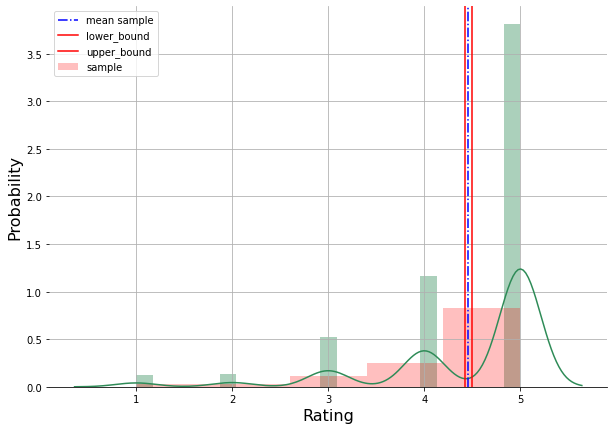

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.distplot(x=rating_df,color='seagreen',ax=ax)
sns.despine(left=True)

# buat histogram
'''ax.hist(populasi['overall'],
        #bins=5,
        density = True,
        facecolor = "g",
        alpha = 0.25,
        label = "populasi")'''

# buat histogram
ax.hist(rating_df,
        bins=5,
        density = True,
        facecolor = "r",
        alpha = 0.25,
        label = "sample")

# plot mean populasi
'''ax.axvline(mean_populasi,
           color = "red",
           linestyle = "--",
           label = "mean populasi")'''

# plot mean mean sample
ax.axvline(y_bar,
           color = "blue",
           linestyle = "-.",
           label = "mean sample")

ax.axvline(lower_bound,
           color = "red",
           linestyle = "-",
           label = "lower_bound")

ax.axvline(upper_bound,
           color = "red",
           linestyle = "-",
           label = "upper_bound")

# Rapihkan plot
ax.set_xlabel("Rating", fontsize=16)
ax.set_ylabel("Probability", fontsize=16)

plt.legend()
plt.grid(True)
plt.show()